In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below


from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = "/content/drive/My Drive/tobaco/New Plant Diseases Dataset(Augmented)/train"
valid_path = "/content/drive/My Drive/tobaco/New Plant Diseases Dataset(Augmented)/valid"

In [6]:
inceptionv3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


87916544/87910968 [==============================] - 1s 0us/step


In [7]:
for layer in inceptionv3.layers:
    layer.trainable = False

In [8]:
folders = glob('/content/drive/My Drive/tobaco/New Plant Diseases Dataset(Augmented)/train/*')

In [9]:
x = Flatten()(inceptionv3.output)
#x = Dropout(0.5)(x)

In [10]:

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inceptionv3.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/tobaco/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18355 images belonging to 10 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/tobaco/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4595 images belonging to 10 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator( training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
) 

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
574/574 [==============================] - 234s 408ms/step - loss: 2.9588 - accuracy: 0.6828 - val_loss: 2.5612 - val_accuracy: 0.7243
Epoch 2/10
574/574 [==============================] - 233s 407ms/step - loss: 2.0371 - accuracy: 0.7914 - val_loss: 2.3328 - val_accuracy: 0.7954
Epoch 3/10
574/574 [==============================] - 234s 408ms/step - loss: 2.1023 - accuracy: 0.8157 - val_loss: 2.3371 - val_accuracy: 0.8202
Epoch 4/10
574/574 [==============================] - 233s 406ms/step - loss: 2.0243 - accuracy: 0.8368 - val_loss: 2.4449 - val_accuracy: 0.8220
Epoch 5/10
574/574 [==============================] - 233s 406ms/step - loss: 2.0615 - accuracy: 0.8478 - val_loss: 2.3845 - val_accuracy: 0.8411
Epoch 6/10
574/574 [==============================] - 233s 406ms/step - loss: 1.7454 - accuracy: 0.8676 - val_loss: 2.3841 - val_accuracy: 0.8431
Epoch 7/10
574/574 [============================

In [17]:
import tensorflow
print(tensorflow.__version__)

2.3.0


In [18]:
import matplotlib.pyplot as plt


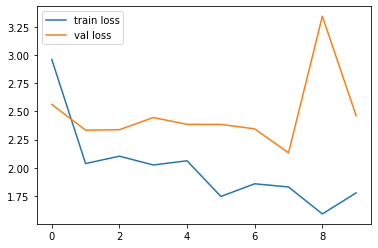

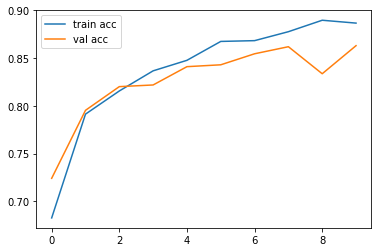

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [34]:

# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inceptionv3.h5')

In [21]:
y_pred = model.predict(test_set)


In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:

y_pred

array([2, 1, 9, ..., 2, 0, 2])

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [25]:
model=load_model('model_inceptionv3.h5')


In [26]:
img=image.load_img('/content/drive/My Drive/tobaco/New Plant Diseases Dataset(Augmented)/valid/Tomato___Late_blight/005e3b43-9050-47da-9498-f9ecdcc703b3___RS_Late.B 5104.JPG',target_size=(224,224))


In [27]:
x=image.img_to_array(img)
x

array([[[186., 174., 174.],
        [171., 159., 159.],
        [184., 172., 172.],
        ...,
        [190., 179., 183.],
        [195., 184., 188.],
        [184., 173., 177.]],

       [[190., 178., 178.],
        [179., 167., 167.],
        [197., 185., 185.],
        ...,
        [187., 176., 180.],
        [195., 184., 188.],
        [191., 180., 184.]],

       [[183., 171., 171.],
        [161., 149., 149.],
        [178., 166., 166.],
        ...,
        [174., 163., 167.],
        [179., 168., 172.],
        [181., 170., 174.]],

       ...,

       [[141., 126., 119.],
        [142., 127., 120.],
        [144., 129., 122.],
        ...,
        [ 98.,  84.,  83.],
        [ 99.,  85.,  84.],
        [ 98.,  84.,  83.]],

       [[130., 115., 108.],
        [130., 115., 108.],
        [138., 123., 116.],
        ...,
        [125., 111., 110.],
        [118., 104., 103.],
        [119., 105., 104.]],

       [[149., 134., 127.],
        [145., 130., 123.],
        [148., 1

In [28]:
x.shape

(224, 224, 3)

In [29]:
x=x/255
#x = np.expand_dims(x, axis=0)

In [30]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

array([[1.9509709e-23, 5.7114960e-08, 1.0000000e+00, 8.3249924e-16,
        1.2748336e-10, 2.7638373e-16, 8.6408719e-19, 5.0657034e-24,
        7.0879289e-11, 1.6792204e-15]], dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data),axis=1)

In [33]:
a

array([2])